In [ ]:
#Stock Market Prediction Algorithm

In [41]:
import numpy as np
import pandas as pd
 
#libraries to be imported for Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [42]:
df=pd.read_csv('RELIANCE.csv')
print(df)

            Date    Symbol Series  Prev Close     Open     High      Low  \
0     2000-01-03  RELIANCE     EQ      233.05   237.50   251.70   237.50   
1     2000-01-04  RELIANCE     EQ      251.70   258.40   271.85   251.30   
2     2000-01-05  RELIANCE     EQ      271.85   256.65   287.90   256.65   
3     2000-01-06  RELIANCE     EQ      282.50   289.00   300.70   289.00   
4     2000-01-07  RELIANCE     EQ      294.35   295.00   317.90   293.00   
...          ...       ...    ...         ...      ...      ...      ...   
5070  2020-05-22  RELIANCE     EQ     1441.25  1451.80  1458.00  1426.50   
5071  2020-05-26  RELIANCE     EQ     1431.55  1448.15  1449.70  1416.30   
5072  2020-05-27  RELIANCE     EQ     1424.05  1431.00  1454.00  1412.00   
5073  2020-05-28  RELIANCE     EQ     1445.55  1455.00  1479.75  1449.00   
5074  2020-05-29  RELIANCE     EQ     1472.25  1468.00  1472.00  1452.65   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0      251.70   25

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 15 columns):
Date                  5075 non-null object
Symbol                5075 non-null object
Series                5075 non-null object
Prev Close            5075 non-null float64
Open                  5075 non-null float64
High                  5075 non-null float64
Low                   5075 non-null float64
Last                  5075 non-null float64
Close                 5075 non-null float64
VWAP                  5075 non-null float64
Volume                5075 non-null int64
Turnover              5075 non-null float64
Trades                2225 non-null float64
Deliverable Volume    4561 non-null float64
%Deliverble           4561 non-null float64
dtypes: float64(11), int64(1), object(3)
memory usage: 594.9+ KB


In [44]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [45]:
x=df.drop(['Date','Symbol','Series','Trades','Deliverable Volume','%Deliverble','Close'],axis=1)
x1=df['Date']

In [46]:
x.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover
0,233.05,237.50,251.70,237.50,251.70,249.37,4456424,1.111319e+14
1,251.70,258.40,271.85,251.30,271.85,263.52,9487878,2.500222e+14
2,271.85,256.65,287.90,256.65,286.75,274.79,26833684,7.373697e+14
3,282.50,289.00,300.70,289.00,293.50,295.45,15682286,4.633254e+14
4,294.35,295.00,317.90,293.00,314.50,308.91,19870977,6.138388e+14


In [47]:
y=df['Close']

In [48]:
y.head()

0    251.70
1    271.85
2    282.50
3    294.35
4    314.55
Name: Close, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [56]:
y_test.head()

3618    1015.40
519      314.05
3398     872.45
3671     979.40
1937    2190.30
Name: Close, dtype: float64

In [53]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [54]:
y_pred

array([1013.10691399,  314.40054396,  867.22088272, ...,  302.62295608,
        949.14184121, 1157.6294639 ])

In [55]:
from sklearn.metrics import accuracy_score
 accuracy_score(y_pred,y_test)

In [35]:
#Graphical Representation Using Matplotlib
#1.Graph comparing the actual and predicted closing value on a particular date
import matplotlib as mpl
mpl.rcParams.update({'font.size': 18, 'font.family': 'serif'})
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
x1.head()

0    2000-01-03
1    2000-01-04
2    2000-01-05
3    2000-01-06
4    2000-01-07
Name: Date, dtype: object

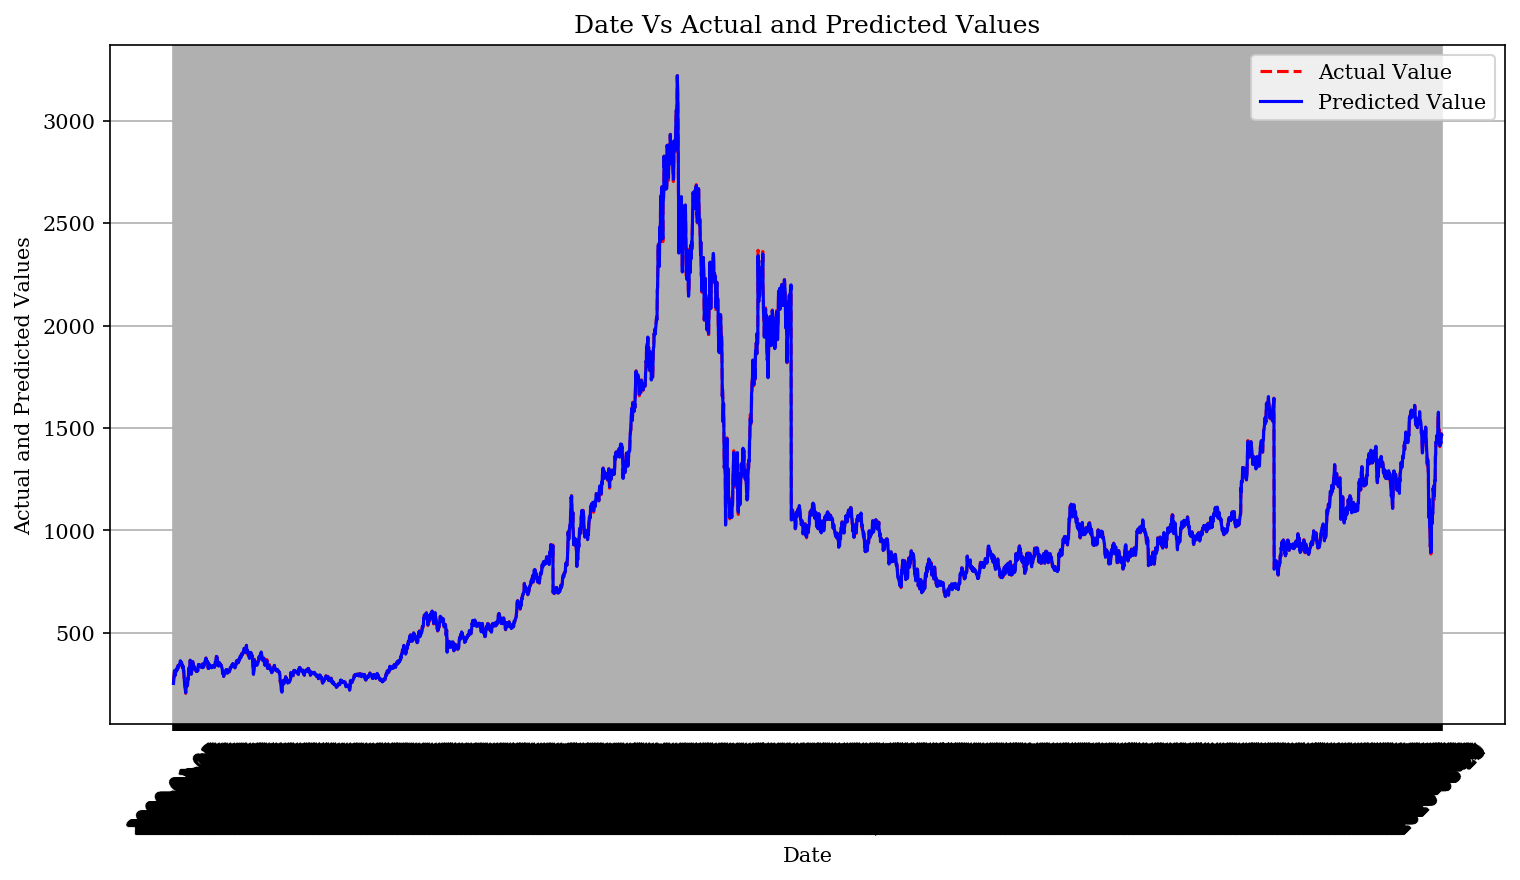

In [37]:
fig=plt.figure(figsize=(12,6),dpi=150)

ax1=plt.subplot2grid((6,6),(0,0),rowspan=6,colspan=6)

ax1.plot(x1,y,c='r',linestyle='--',label='Actual Value')
ax1.plot(x1,y_pred,c='b',linestyle='solid',label='Predicted Value')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.title('Date Vs Actual and Predicted Values')
plt.xlabel('Date')
plt.ylabel('Actual and Predicted Values')
plt.grid(True)


In [38]:
#Graphical Representation Using Plotly
#1.Graph comparing the actual and predicted closing value on a particular date
import plotly.graph_objs as go
from plotly.offline import plot

In [39]:
trace0 = go.Scatter(x=x1,y=y,mode='lines+markers',name='Actual Value')
trace1 = go.Scatter(x=x1,y=y_pred,mode='lines+markers',name='Predicted Value')

data=[trace0,trace1]

layout=dict(title='Date vs Actual And Predicted Values')

fig=dict(data=data,layout=layout)
fig=go.Figure(fig)
fig.show()

In [40]:
#1.Graph showing the opening and closing value on a particular date
y3=df['High']
y4=df['Low']

trace0 = go.Scatter(x=x1,y=y3,mode='lines+markers',name='Highest Value')
trace1 = go.Scatter(x=x1,y=y4,mode='lines+markers',name='Lowest Value')

data=[trace0,trace1]

layout=dict(title='Date vs Highest and Lowest Values')

fig=dict(data=data,layout=layout)
fig=go.Figure(fig)
fig.show()

In [60]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("RELIANCE.csv")
X = df.iloc[:, 3:11].values
y = df.iloc[:, 11].values
y = y.reshape(-1,1)

#Splitting the module
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=0)

#Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

#create regressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_test,y_test)

# Predicting new value
y_pred = regressor.predict(X_test)

# Accuracy
acc = regressor.score(X_test,y_test)


C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [61]:
x.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover
0,233.05,237.50,251.70,237.50,251.70,249.37,4456424,1.111319e+14
1,251.70,258.40,271.85,251.30,271.85,263.52,9487878,2.500222e+14
2,271.85,256.65,287.90,256.65,286.75,274.79,26833684,7.373697e+14
3,282.50,289.00,300.70,289.00,293.50,295.45,15682286,4.633254e+14
4,294.35,295.00,317.90,293.00,314.50,308.91,19870977,6.138388e+14


In [59]:
y.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'